# Assignement 2

This is your second assignement in the computer vision course. This time you are supposed to implement a system that outputs bounding boxes (bb) of pedestrians.

**Bounding box definition:** the smallest axis aligned rectangle containing all the pixels of the pedestrian

Ouput format:
 - A list of [frame_id, bb_id, x, y, dx, dy]. See prenom_nom.py module for an example
 
Evaluation function:
 - Detections are converted into binary masks and we calculate the following metrics: intersecion over union. Note that this metric is not sensitive to the number of bb-s. You can find the code below for the evaluation.
 - The evaluation will be performed in an independent video sequence.
 
Scoring:
 - Your work will be evaluated as usual (complexity of the solution, clean implementation, well documented) **PLUS** the best 5 will receive +1 for the grade of the assignement.
 
You have to handle in:
 - Your code that is a single python module (possibly with requirements.txt or with a dockerfile). See the example prenom_nom.py. It has to implement the same interface, if it fails to run, your solution is considered failing.
 - Your report. Short summary of your algorithm, motivation for the algorithm used, failing cases, code and results (~1 page).
 
You should send your assignment by mail to maria.vakalopoulou@centralesupelec.fr, the name of the subject of the mail should be: VIC_Assignement2_name
 

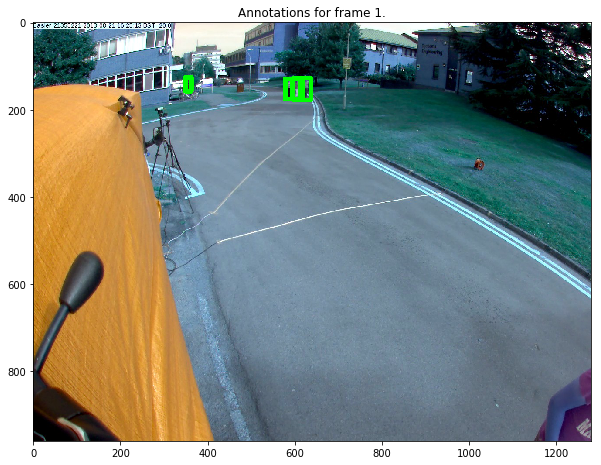

A perfect score... 1.0
A great score! 0.0


In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import os
import numpy as np
import yourname


data_root = './img1/'
gt_path = './gt/gt.txt'

_W = 1280
_H = 960
_N = 684 # number of frames

def format_id(frame):
    assert _N >= frame
    return '{:03d}'.format(frame)


def read_frame(root, frame):
    """Read frames and create integer frame_id-s"""
    assert _N >= frame
    return cv2.imread(os.path.join(root,format_id(frame)+'.jpg'), cv2.IMREAD_UNCHANGED)
    

def read_gt(filename):
    """Read gt and create list of bb-s"""
    assert os.path.exists(filename)
    with open(filename, 'r') as file:
        lines = file.readlines()
    # truncate data (last columns are not needed)
    return [list(map(lambda x: int(x), line.split(',')[:6])) for line in lines]


def annotations_for_frame(solution, frame):
    assert _N >= frame
    return [bb for bb in solution if int(bb[0])==int(frame)]


def evaluate_solution(gt, solution, N):
    """Caclulate evaluation metric"""
    score = []
    #for frame in [300]:
    for frame in range(1, N):
        bbs_sol = annotations_for_frame(solution, frame)
        bbs_gt = annotations_for_frame(gt, frame)
        black_sol = np.zeros((_H, _W))
        black_gt = np.zeros((_H, _W))
        for bb in bbs_sol:
            x, y = bb[2:4]
            dx, dy = bb[4:6]
            cv2.rectangle(black_sol, (x, y), (x+dx, y+dy), (255), -1)
        for bb in bbs_gt:
            x, y = bb[2:4]
            dx, dy = bb[4:6]
            cv2.rectangle(black_gt, (x, y), (x+dx, y+dy), (255), -1)
        # intersection over union
        intersection = black_sol * black_gt
        intersection[intersection > 0.5] = 1
        union = black_sol + black_gt
        union[union > 0.5] = 1
        if not union.any():
            continue
        score.append(intersection.sum()/union.sum())
        
        
    return np.asarray(score).mean()
    

def show_annotation(solution, frame):
    assert _N >= frame
    im = read_frame(data_root, frame)
    bbs = annotations_for_frame(solution, frame)
    for bb in bbs:
        x, y = bb[2:4]
        dx, dy = bb[4:6]
        cv2.rectangle(im, (x, y), (x+dx, y+dy), (0,255,0), 10)
    plt.figure(figsize=(10, 10))
    plt.imshow(im)
    plt.title('Annotations for frame {}.'.format(frame))
    plt.show()
    return

gt = read_gt(gt_path)

show_annotation(gt, 1)

print('A perfect score... {}'.format(evaluate_solution(gt, gt, _N)))

# your solution will be tested simply by changing the dataset
# and changing the module, i.e., the following has to work 
# with simply using your module 
sol = yourname.pedestrians()
print('A great score! {}'.format(evaluate_solution(gt, sol, _N)))

In [15]:
bb = [tmp for tmp in gt if tmp[0]==1]
print(bb)

[[1, 1, 617, 128, 20, 50], [1, 2, 595, 129, 18, 48], [1, 3, 578, 130, 17, 46], [1, 4, 349, 126, 14, 32]]


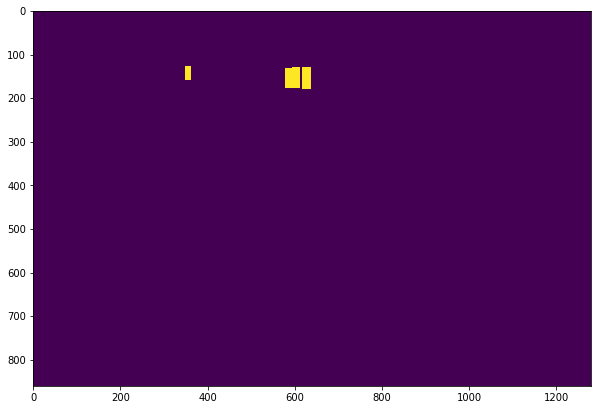

In [16]:
tmp = np.zeros((860, 1280))

for _bb in bb:
    x, y, dx, dy = _bb[2:]
    tmp[y:y+dy, x:x+dx] = 1

plt.figure(figsize=(10, 10))
plt.imshow(tmp)
plt.show()